In [2]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [3]:
client = Client(n_workers=24)
client

Client Scheduler: tcp://127.0.0.1:39329 Dashboard: /proxy/8787/status,Cluster Workers: 24 Cores: 48 Memory: 202.48 GB


In [4]:
session = cc.database.create_session()

In [5]:
exptdict = OrderedDict([
    ('01deg_IAF_cycle1',  {'expt':'01deg_jra55v140_iaf','dir':'access-om2-01'}),
    ('01deg_IAF_cycle2',  {'expt':'01deg_jra55v140_iaf_cycle2','dir':'access-om2-01'})
                        ])

## Scalar diagnostics

In [9]:
def plot_timeseries(variable):
    plt.figure(figsize=(10,5))
    for ekey in exptdict.keys():
        expt = exptdict[ekey]['expt']
        var = cc.querying.getvar(expt,variable,session)
        var.resample(time='Y').mean().plot(label=ekey)
    plt.title(variable)
    plt.legend()
    return

### Global Average Temperature

CPU times: user 46.5 s, sys: 1.76 s, total: 48.3 s
Wall time: 54.5 s


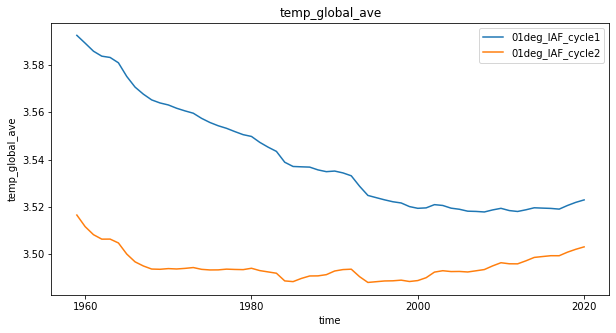

In [10]:
%%time
plot_timeseries('temp_global_ave')

### Global Average Salinity

CPU times: user 47.5 s, sys: 1.28 s, total: 48.8 s
Wall time: 50.1 s


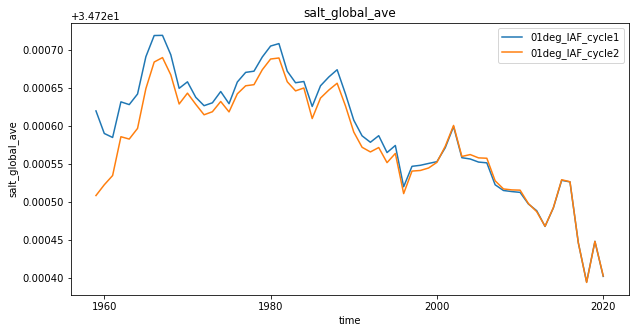

In [11]:
%%time
plot_timeseries('salt_global_ave')

### Surface Temperature

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 46.2 s, sys: 1.15 s, total: 47.4 s
Wall time: 48.7 s


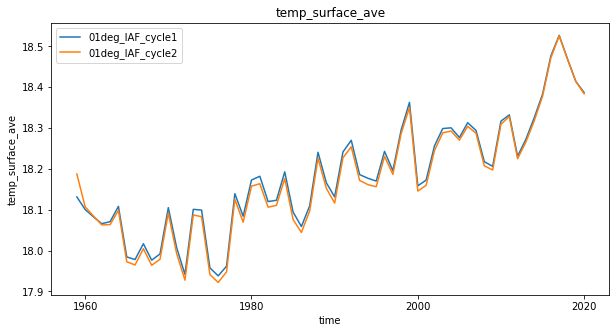

In [12]:
%%time
plot_timeseries('temp_surface_ave')

### Surface Salinity

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 46.1 s, sys: 1.1 s, total: 47.2 s
Wall time: 48.7 s


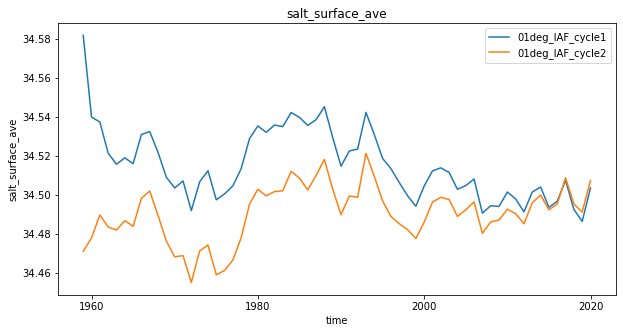

In [13]:
%%time
plot_timeseries('salt_surface_ave')

### Total Kinetic Energy

distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 47.6 s, sys: 1.24 s, total: 48.8 s
Wall time: 50.5 s


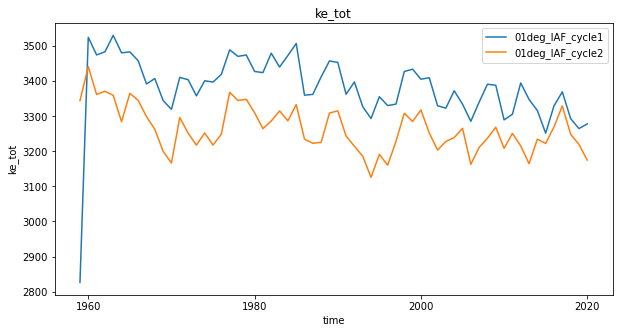

In [14]:
%%time
plot_timeseries('ke_tot')

## Area-Averaged Tracer Diagnostics

### Upper Ocean Temperature/Salinity

Just Southern Ocean for now. Upper 1000 m.

01deg_jra55v140_iaf


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

01deg_jra55v140_iaf_cycle2


Text(0.5, 1.0, 'Upper Southern Ocean (< 1000) temperature')

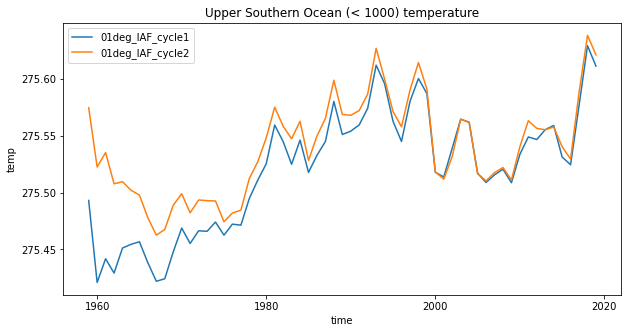

In [9]:
plt.figure(figsize=(10,5))
zlevel = 1000
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'temp',session,ncfile='ocean-3d-temp-1-monthly-mean-ym_%.nc')
    varmean = var.sel(st_ocean = slice(0,zlevel)).mean('st_ocean').sel(yt_ocean = slice(-70,-45)).mean('yt_ocean').mean('xt_ocean').resample(time='Y').mean()
    varmean.plot(label=ekey)
plt.legend()
plt.title('Upper Southern Ocean (< '+str(zlevel)+') temperature')

01deg_jra55v140_iaf
01deg_jra55v140_iaf_cycle2


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Text(0.5, 1.0, 'Upper Southern Ocean (< 1000) salinity')

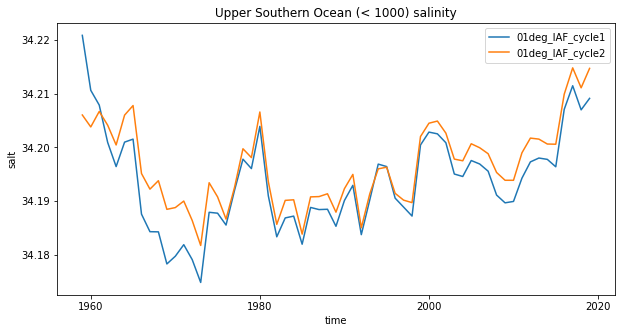

In [8]:
plt.figure(figsize=(10,5))
zlevel = 1000
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'salt',session,ncfile='ocean-3d-salt-1-monthly-mean-ym_%.nc')
    varmean = var.sel(st_ocean = slice(0,zlevel)).mean('st_ocean').sel(yt_ocean = slice(-70,-45)).mean('yt_ocean').mean('xt_ocean').resample(time='Y').mean()
    varmean.plot(label=ekey)
plt.legend()
plt.title('Upper Southern Ocean (< '+str(zlevel)+') salinity')


### Deep Ocean Temperature/Salinity

Restricted to Atlantic region, below 3000 m for now.

01deg_jra55v140_iaf
01deg_jra55v140_iaf_cycle2


Text(0.5, 1.0, 'Deep Atlantic Ocean (> 3000) temperature')

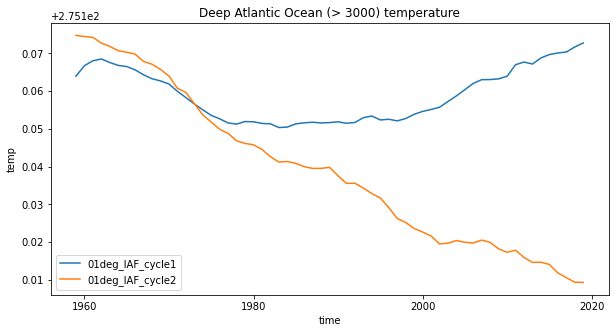

In [6]:
plt.figure(figsize=(10,5))
zlevel = 3000
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'temp',session,ncfile='ocean-3d-temp-1-monthly-mean-ym_%.nc')
    varmean = var.sel(st_ocean = slice(zlevel,None)).mean('st_ocean').sel(yt_ocean = slice(-30,30)).mean('yt_ocean').sel(xt_ocean = slice(-60,10)).mean('xt_ocean').resample(time='Y').mean()
    varmean.plot(label=ekey)
plt.legend()
plt.title('Deep Atlantic Ocean (> '+str(zlevel)+') temperature')

01deg_jra55v140_iaf
01deg_jra55v140_iaf_cycle2


Text(0.5, 1.0, 'Deep Atlantic Ocean (> 3000) salinity')

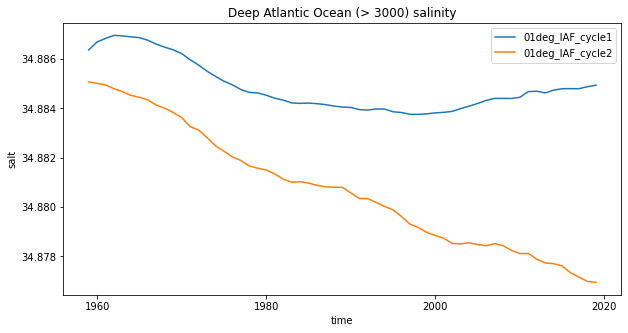

In [7]:
plt.figure(figsize=(10,5))
zlevel = 3000
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'salt',session,ncfile='ocean-3d-salt-1-monthly-mean-ym_%.nc')
    varmean = var.sel(st_ocean = slice(zlevel,None)).mean('st_ocean').sel(yt_ocean = slice(-30,30)).mean('yt_ocean').sel(xt_ocean = slice(-60,10)).mean('xt_ocean').resample(time='Y').mean()
    varmean.plot(label=ekey)
plt.legend()
plt.title('Deep Atlantic Ocean (> '+str(zlevel)+') salinity')

## Circulation Diagnostics

### Drake Passage Transport

01deg_jra55v140_iaf
01deg_jra55v140_iaf_cycle2
CPU times: user 11 s, sys: 1.24 s, total: 12.3 s
Wall time: 17.8 s


Text(0.5, 1.0, 'ACC Transport')

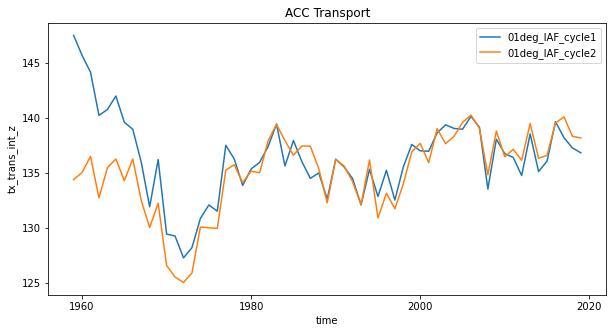

In [10]:
%%time

xmin=-69.9
ymin=-71.6
ymax=-51.0

variable='tx_trans_int_z'
plt.figure(figsize=(10,5))
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session)
    DP = var.sel(xu_ocean=xmin, method='nearest').sel(yt_ocean=slice(ymin, ymax)).sum('yt_ocean').resample(time='Y').mean()/1e6/1036
    DP.plot(label=ekey)

plt.legend()
plt.title("ACC Transport")

### AABW overturning circulation @ 55°S

01deg_jra55v140_iaf
01deg_jra55v140_iaf_cycle2
CPU times: user 5min 38s, sys: 12.4 s, total: 5min 50s
Wall time: 6min 8s


Text(0.5, 1.0, 'AABW Cell')

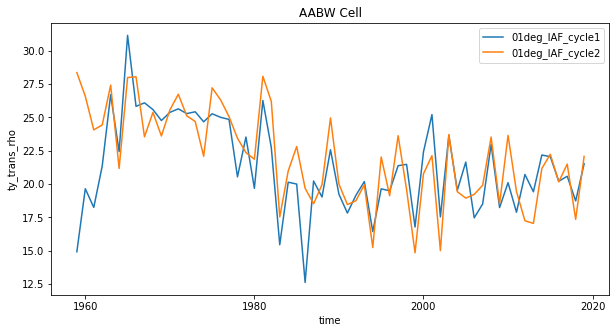

In [15]:
%%time
latitude=-55
plt.figure(figsize=(10,5))
variable='ty_trans_rho'
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session)
    psi_aabw = var.sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=latitude)*1.0e-9
    psi_aabw_sum = psi_aabw.cumsum('potrho') - psi_aabw.sum('potrho')
    psi_aabw_sum = -psi_aabw_sum.sel(potrho=slice(1036.2,None)).min('potrho').resample(time='Y').mean()
    psi_aabw_sum.plot(label=ekey)
plt.legend()
plt.title('AABW Cell')

### AMOC Overturning @ 26°N

01deg_jra55v140_iaf
01deg_jra55v140_iaf_cycle2
CPU times: user 1min 46s, sys: 5.46 s, total: 1min 51s
Wall time: 2min


Text(0.5, 1.0, 'AMOC Cell')

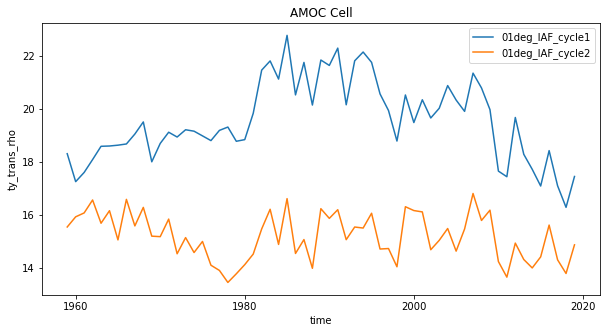

In [16]:
%%time
plt.figure(figsize=(10,5))
variable='ty_trans_rho'
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session)
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    psi_amoc_sum = psi_amoc_sum.sel(potrho=slice(1035.5,None)).max('potrho').resample(time='Y').mean()
    psi_amoc_sum.plot(label=ekey)
plt.legend()
plt.title('AMOC Cell')

## Global Overturning Streamfunction
Plot from last 10 years of each cycle

In [13]:
def plot_psi(psi_avg, clev=np.arange(-25,25,2)):    
    p1 = plt.contourf(psi_avg.grid_yu_ocean, 
                 psi_avg.potrho, 
                 psi_avg, 
                 cmap=cm.cm.delta,levels=clev,extend='both')
    plt.contour(psi_avg.grid_yu_ocean, 
                psi_avg.potrho, 
                psi_avg, levels=clev, colors='k', linewidths=0.25)
    plt.contour(psi_avg.grid_yu_ocean,
                psi_avg.potrho, psi_avg,
                levels=[0.0,], colors='k', linewidths=0.5)
    plt.gca().invert_yaxis()
    
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75,85])
    
    return p1

In [ ]:
plt.figure(figsize=(15,10))
variable='ty_trans_rho'
ii=0
for ekey in exptdict.keys():
    ii+=1
    plt.subplot(2,2,ii)
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,start_time='2009-01-01',end_time='2019-01-01')
    psi = var.mean('time').sum('grid_xt_ocean')*1.0e-9
    psi_avg = psi.cumsum('potrho') -  psi.sum('potrho')
    psi_avg.load()
    p1 = plot_psi(psi_avg)
    plt.title(ekey)



01deg_jra55v140_iaf


distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing


### Ice Area (in both hemispheres)

In [ ]:
variable='aice_m'
fig,ax = plt.subplots(1,2,figsize=(14,6))
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    var = cc.querying.getvar(expt,variable,session,coords="all")
    area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
    var.coords['ni'] = area_t['xt_ocean'].values
    var.coords['nj'] = area_t['yt_ocean'].values
    var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
    area = var*area_t
    area_zonalsum = area.sum('xt_ocean')
    NH_area = area_zonalsum.sel(yt_ocean=slice(45, 90)).sum('yt_ocean').load()
    NH_area.plot(ax=ax[0],label=ekey)
    SH_area = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
    SH_area.plot(ax=ax[1],label=ekey)
plt.legend()
ax[0].set_title('Arctic')
ax[1].set_title('Southern Ocean')

### Ice volume (in both hemispheres)

In [ ]:
variable='vicen_m'
fig,ax = plt.subplots(1,2,figsize=(14,6))
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    var = cc.querying.getvar(expt,variable,session,coords="all")
    area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
    var.coords['ni'] = area_t['xt_ocean'].values
    var.coords['nj'] = area_t['yt_ocean'].values
    var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
    vol = var*area_t
    vol_zonalsum = vol.sum('xt_ocean').sum('nc')
    NH_vol = vol_zonalsum.sel(yt_ocean=slice(45, 90)).sum('yt_ocean').load()
    NH_vol.plot(ax=ax[0],label=ekey)
    SH_vol = vol_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
    SH_vol.plot(ax=ax[1],label=ekey)
plt.legend()
ax[0].set_title('Arctic')
ax[1].set_title('Southern Ocean')